In [2]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import pickle


In [3]:
reader = torchvision.io.VideoReader('../data/SPK20220308/videos/SpikeCam1_03-08-1557.mp4', 'video')


RuntimeError: Not compiled with video_reader support, to enable video_reader support, please install ffmpeg (version 4.2 is currently supported) and build torchvision from source.

In [3]:
fpath = '../data/SPK20220308/task_data/'
experiment_dict = sio.loadmat(f'{fpath}eventsCB1_corrected2.mat')
ev_ex = experiment_dict['eventsCB1']

In [4]:
cam_frames = np.load('cam_frames.npy')

In [6]:
#Load variables from struct (struct indexing is unfortunately hideous)
tgtON = ev_ex['tgtON_C'][0][0][0]
gocON = ev_ex['gocON_C'][0][0][0]
gocOFF = ev_ex['gocOFF'][0][0][0]
stmv = ev_ex['stmv_C'][0][0][0]
contact = ev_ex['contact_C'][0][0][0]
endhold = ev_ex['endhold_C'][0][0][0]
gripori = ev_ex['GRIPORI_C'][0][0][0]
layout = ev_ex['LAYOUT_C'][0][0][0]
position = ev_ex['POSITION_C'][0][0][0]
reward = ev_ex['reward'][0][0][0]
error = ev_ex['error'][0][0][0]

In [7]:
e_start = -3
e_stop = 0
analog_sampling_rate = 1000

event_ts = contact
frame_idx_list = list()
for e_idx, e_ts in enumerate(event_ts):    
    #Load kinematic data
    #Identify which frames fall in the time window
    frame_mask = np.logical_and(cam_frames > ((e_ts+e_start) * analog_sampling_rate), cam_frames < ((e_ts+e_stop) * analog_sampling_rate))
    frame_idx = np.flatnonzero(frame_mask) #Pull out indeces of valid frames
    frame_idx_list.append(frame_idx)

In [8]:
endhold - stmv

array([0.9127    , 0.89086667, 1.10916667, 0.80873333, 0.90916667,
       1.20156667, 0.9851    , 0.88413333, 1.0632    , 1.07803333,
       1.14076667, 1.41926667, 1.3285    , 1.1401    , 1.0871    ,
       0.9708    , 1.29123333, 1.12886667, 0.77143333, 1.01586667,
       1.05713333, 1.03546667, 1.0596    , 0.9775    , 0.82953333,
       1.0394    , 2.23383333, 1.02686667, 0.93943333, 1.02393333,
       0.99863333, 1.0006    , 0.9926    , 1.01643333, 1.20886667,
       0.9216    , 0.94016667, 1.02923333, 0.97716667, 1.0634    ,
       0.9992    , 0.9556    , 1.17816667, 0.94553333, 1.05983333,
       0.96266667, 1.0319    , 1.0437    , 1.58713333, 1.37646667,
       1.37536667, 1.16923333, 1.17866667, 0.96953333, 1.0985    ,
       1.20236667, 1.0588    , 1.26413333, 1.09416667, 0.93803333,
       1.25573333, 1.09693333, 1.06026667, 1.40726667, 1.28146667,
       0.86863333, 1.04086667, 0.93123333, 1.0984    , 1.05766667,
       1.28216667, 1.36816667, 2.13326667, 1.409     , 1.07866

In [9]:
cam_start = cam_frames[0] / analog_sampling_rate

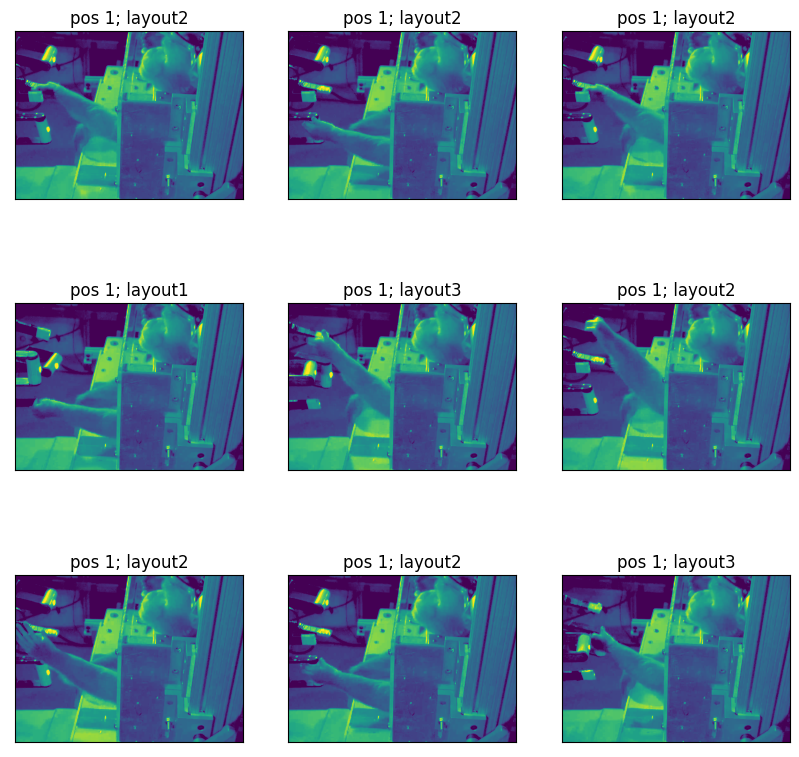

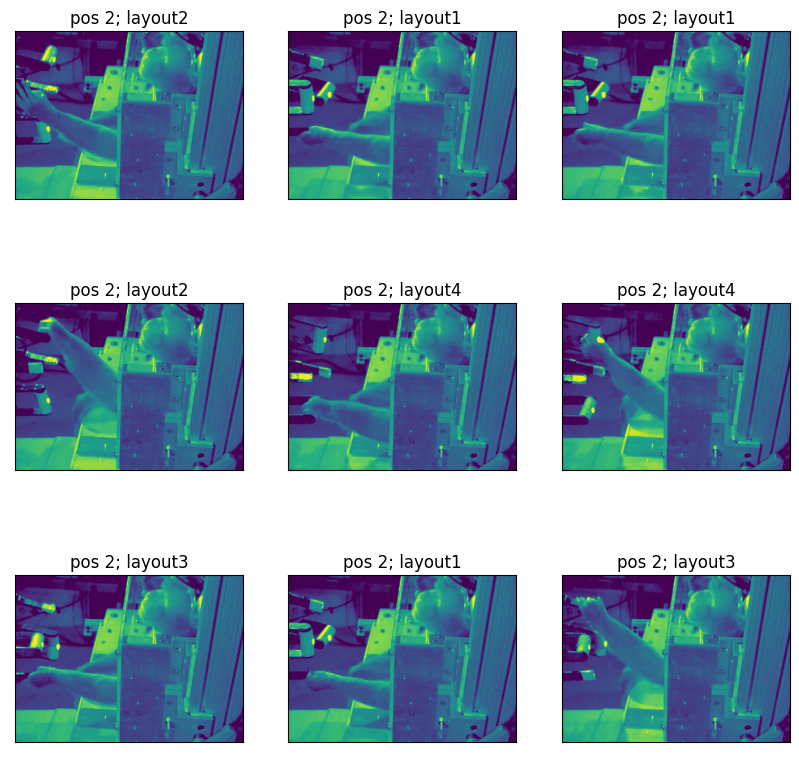

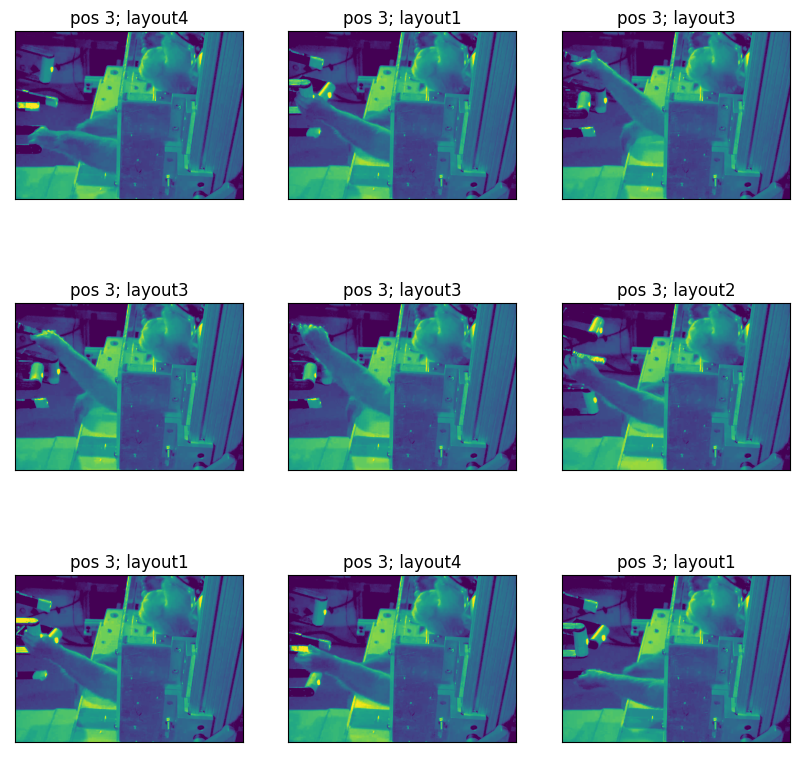

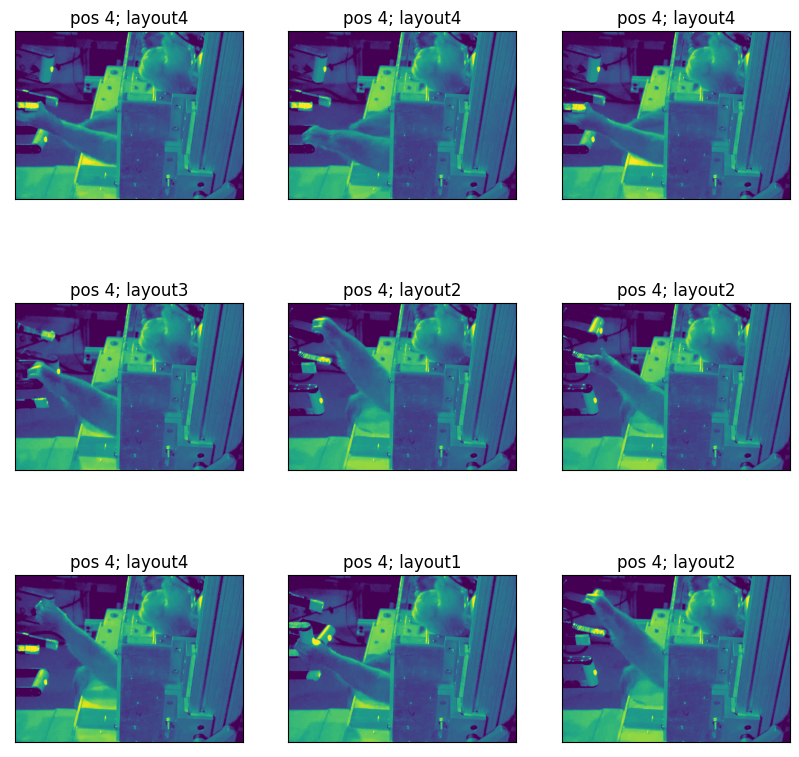

In [12]:
for pos_idx in range(1,5):
    plt.figure(figsize=(10,10))
    pos_filter = np.where(position == pos_idx)[0]
    for plot_idx in range(9):
        idx = pos_filter[plot_idx] + 10

        plt.subplot(3, 3, plot_idx + 1)
        reader.seek(stmv[idx] - cam_start + 0.5)
        frame = next(reader)
        plt.imshow(frame['data'].numpy()[0,:,:])
        plt.title(f'pos {pos_idx}; layout{layout[idx]}')
        plt.xticks([])
        plt.yticks([])
        #plt.tight_layout()
    

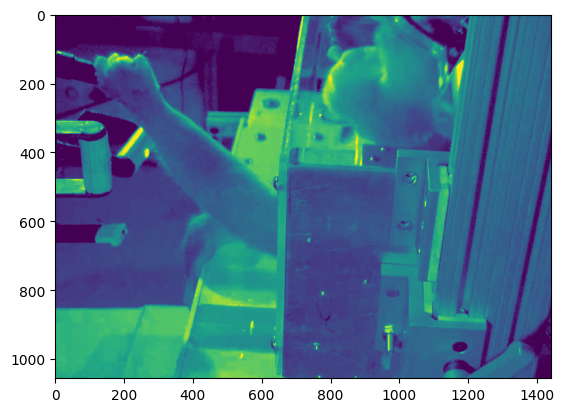

In [52]:
reader.seek(endhold[5] - cam_start)
frame = next(reader)
plt.imshow(frame['data'].numpy()[0,:,:])